In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [82]:
def produce_csv(file):
    df = pd.read_csv(file, sep="\t", header=None, 
                     names=["x_mm", "y_mm", "theta_deg", "odom_dist_mm", "mx", "my", "mz", "spacebar", "ts_ms"],
                     usecols=[0,1,3,4,5,6,7,17,18]
                     )
    # print(df.head())

    print(f"SUM OF SPACEBARS: {df.spacebar.sum()}, {file}")

    df2 = pd.DataFrame()
    # Timestamps in seconds
    df2["t"] = (df.ts_ms - df.ts_ms[0])/1000

    # Use meters
    df2["x"] = df.x_mm/1000
    df2["y"] = df.y_mm/1000

    # Use radians
    df2["theta"] = df.theta_deg/360*2*np.pi

    # Scale magnetic field to uT and flip y and z axis
    df2["mx"] = df.mx/32
    df2["my"] = -df.my/32
    df2["mz"] = -df.mz/32

    # Some files have different scaling, so fix this
    if "CALIB" not in file:
        while df2.mz.mean() > -30:
            print(f"Fixing scaling in file {file}")
            df2["mx"] *= 2
            df2["my"] *= 2
            df2["mz"] *= 2

    # Median filter to remove outliers
    df2["mx"] = df2["mx"].rolling(5, center=True).median().bfill().ffill()
    df2["my"] = df2["my"].rolling(5, center=True).median().bfill().ffill()
    df2["mz"] = df2["mz"].rolling(5, center=True).median().bfill().ffill()

    # Include spacebars (loop closures for verification data)
    df2["spacebar"] = df.spacebar

    plt.figure()
    plt.plot(df2.x, df2.y)
    plt.axis("equal")
    plt.title(file)

    plt.figure()
    plt.plot(df2.t, df2.mx)
    plt.plot(df2.t, df2.my)
    plt.plot(df2.t, df2.mz)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ix = slice(0, None, 10)
    ax.scatter(df2.mx[ix], df2.my[ix], df2.mz[ix], "o")

    new_file = file.replace(".txt", ".csv").replace("original_txt", "processed_csv")
    os.makedirs(os.path.dirname(new_file), exist_ok=True)
    df2.to_csv(new_file, index=None)






SUM OF SPACEBARS: 0, ../data/original_txt/calibration_data/CALIB_SCB_0.txt
SUM OF SPACEBARS: 0, ../data/original_txt/calibration_data/CALIB_SCB.txt
SUM OF SPACEBARS: 0, ../data/original_txt/calibration_data/CALIB_SCB_180.txt
SUM OF SPACEBARS: 18, ../data/original_txt/validation_data/cse_checkpoints_2011-03-30_a.txt
SUM OF SPACEBARS: 24, ../data/original_txt/validation_data/discus_checkpoints_2011-03-26.txt
Fixing scaling in file ../data/original_txt/validation_data/discus_checkpoints_2011-03-26.txt
Fixing scaling in file ../data/original_txt/validation_data/discus_checkpoints_2011-03-26.txt
SUM OF SPACEBARS: 18, ../data/original_txt/validation_data/cse_checkpoints_2011-03-30_b.txt
SUM OF SPACEBARS: 30, ../data/original_txt/validation_data/discus_checkpoints_2011-03-23.txt
Fixing scaling in file ../data/original_txt/validation_data/discus_checkpoints_2011-03-23.txt
SUM OF SPACEBARS: 25, ../data/original_txt/validation_data/discus_checkpoints_2011-03-25.txt
SUM OF SPACEBARS: 18, ../data/

/tmp/ipykernel_5828/935941234.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


SUM OF SPACEBARS: 0, ../data/original_txt/mapping_data/cse_lobby_2011-03-27.txt
SUM OF SPACEBARS: 0, ../data/original_txt/mapping_data/discus_2011-01-05.txt
Fixing scaling in file ../data/original_txt/mapping_data/discus_2011-01-05.txt
Fixing scaling in file ../data/original_txt/mapping_data/discus_2011-01-05.txt
SUM OF SPACEBARS: 0, ../data/original_txt/mapping_data/apartment_2_2011-03-22.txt
Fixing scaling in file ../data/original_txt/mapping_data/apartment_2_2011-03-22.txt
SUM OF SPACEBARS: 0, ../data/original_txt/mapping_data/discus_center_2011-03-23.txt
Fixing scaling in file ../data/original_txt/mapping_data/discus_center_2011-03-23.txt
SUM OF SPACEBARS: 28, ../data/original_txt/mapping_data/discus_2010-12-03.txt
Fixing scaling in file ../data/original_txt/mapping_data/discus_2010-12-03.txt
Fixing scaling in file ../data/original_txt/mapping_data/discus_2010-12-03.txt
SUM OF SPACEBARS: 0, ../data/original_txt/mapping_data/discus_center_2011-03-25.txt
SUM OF SPACEBARS: 0, ../data/

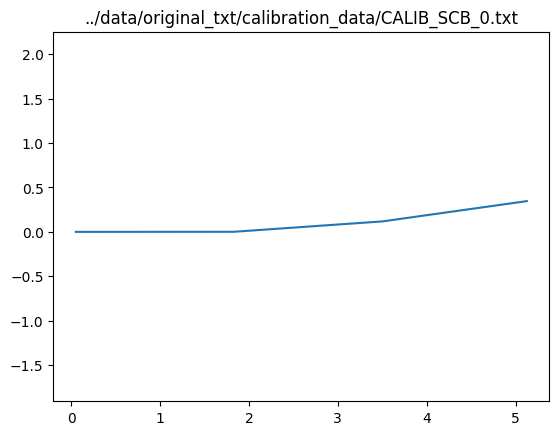

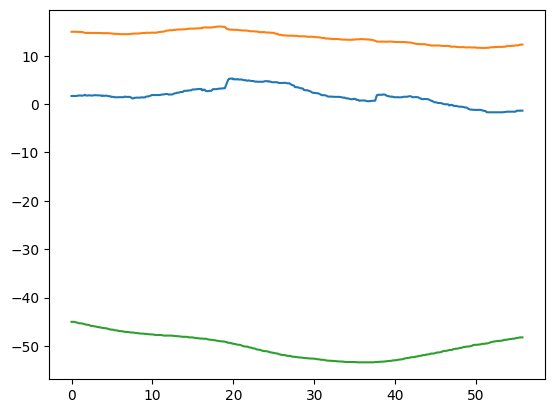

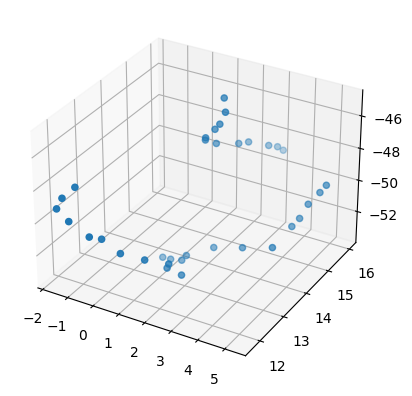

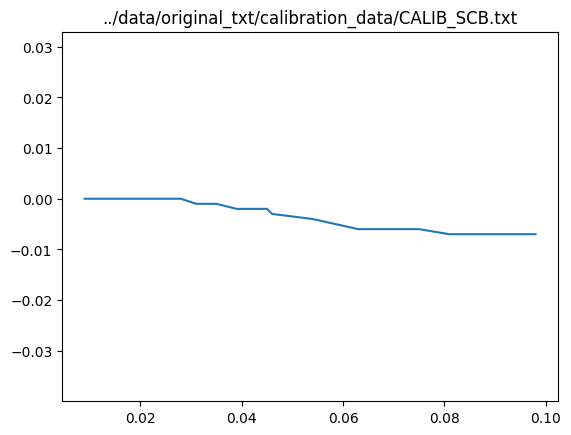

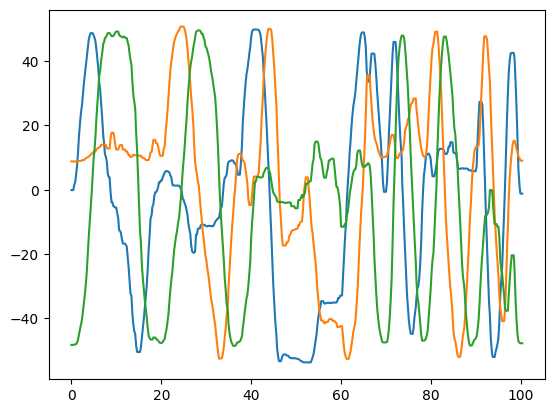

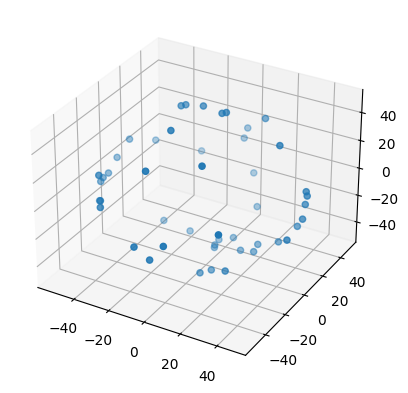

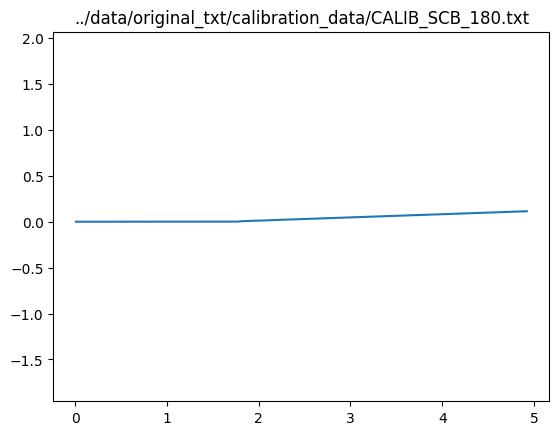

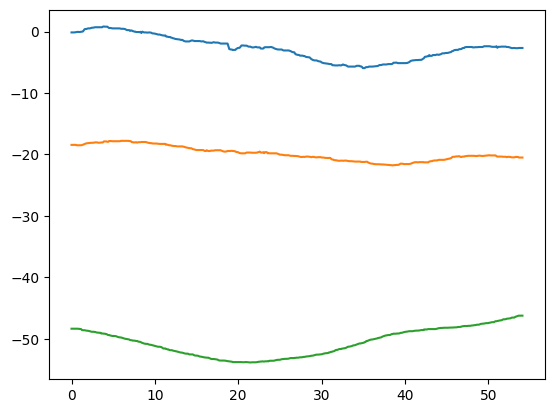

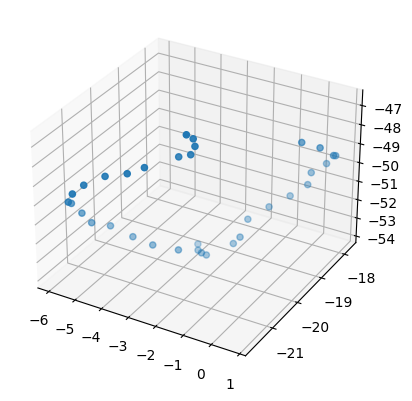

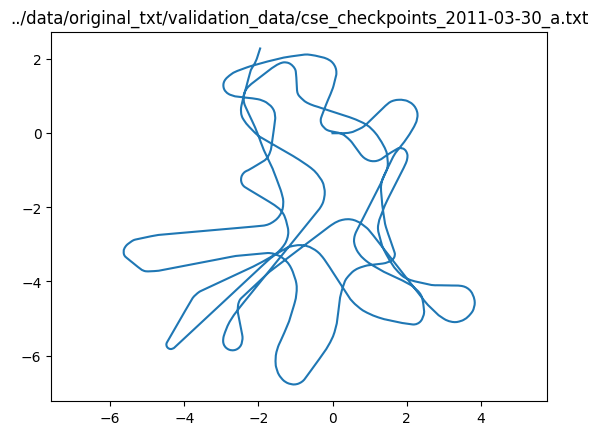

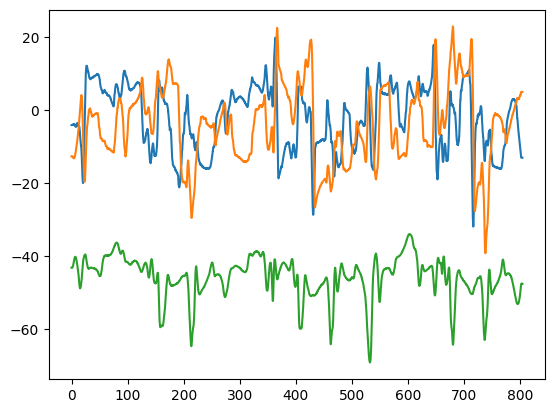

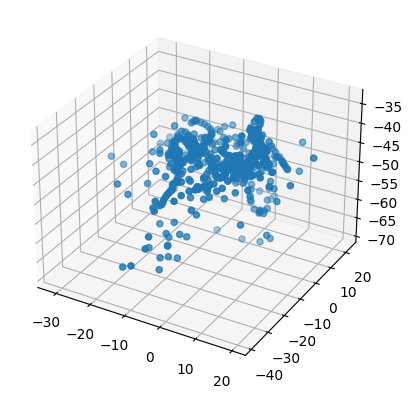

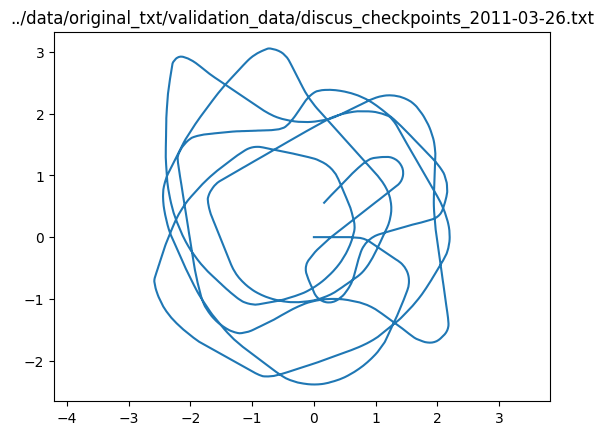

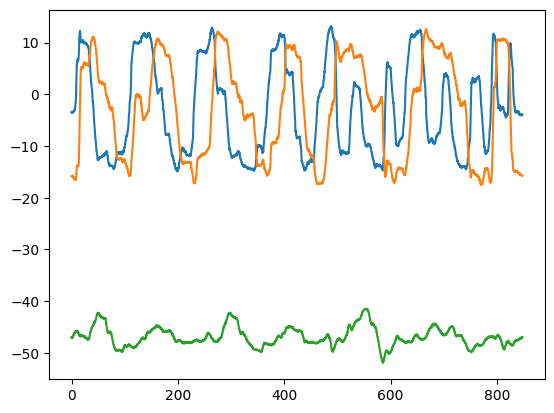

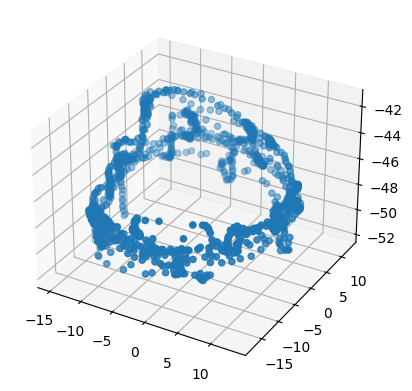

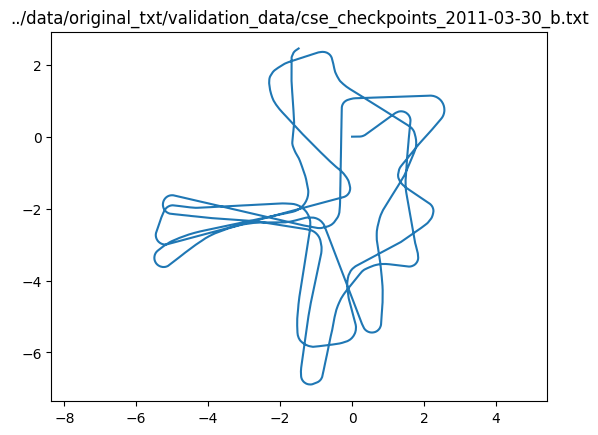

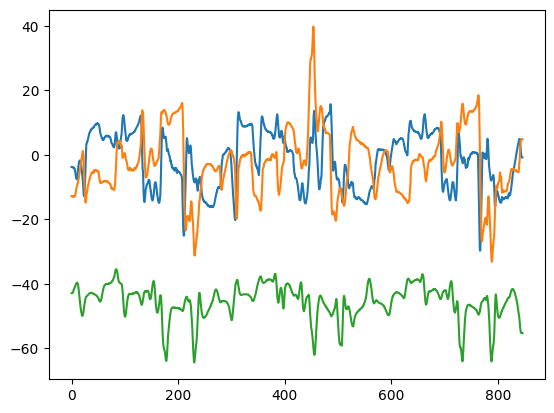

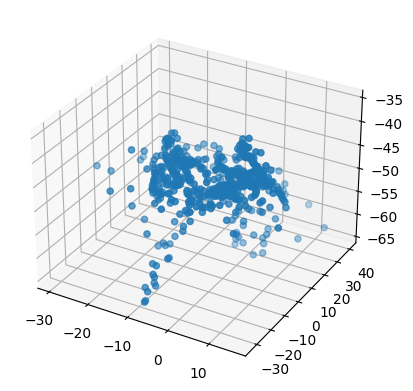

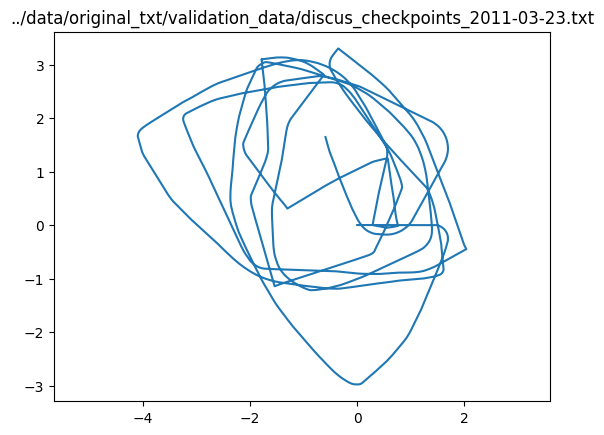

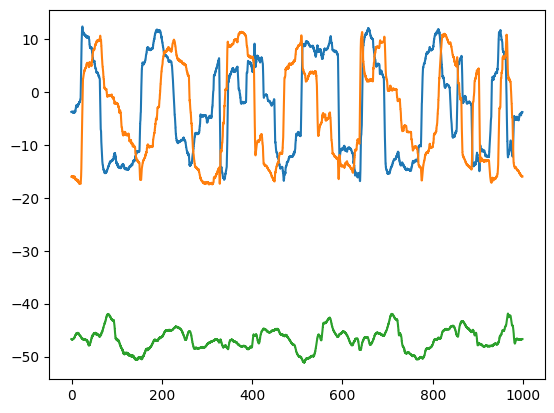

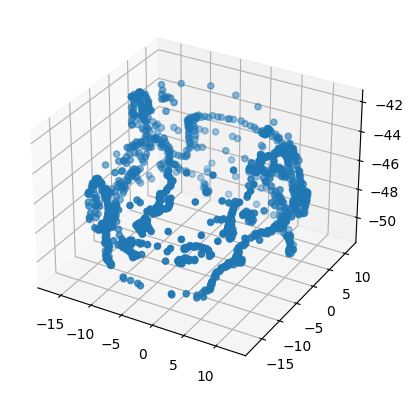

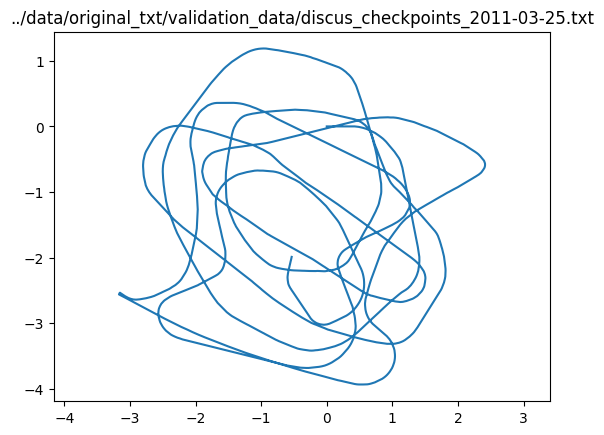

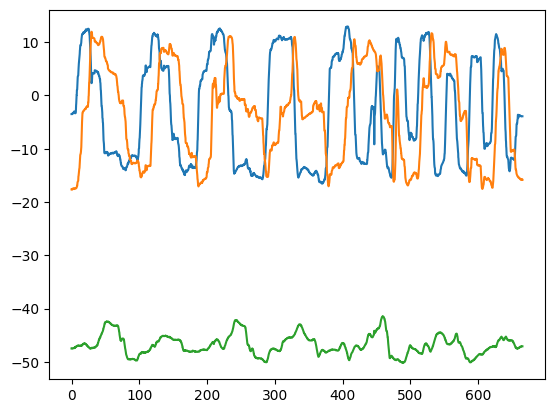

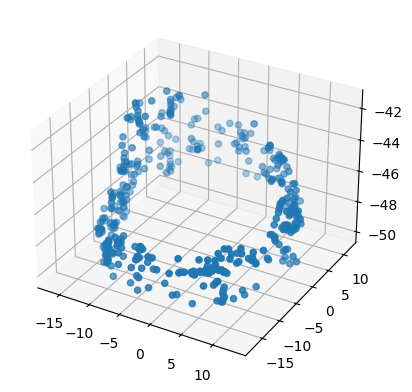

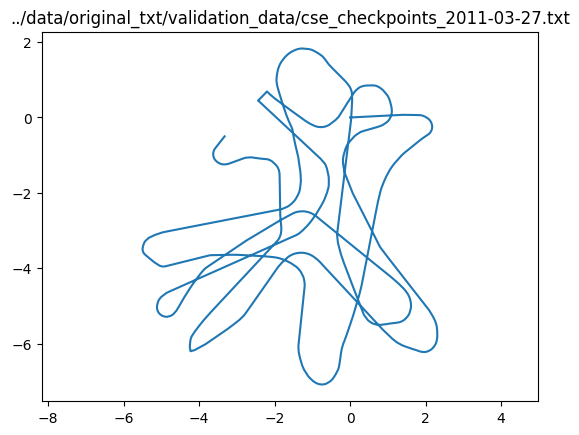

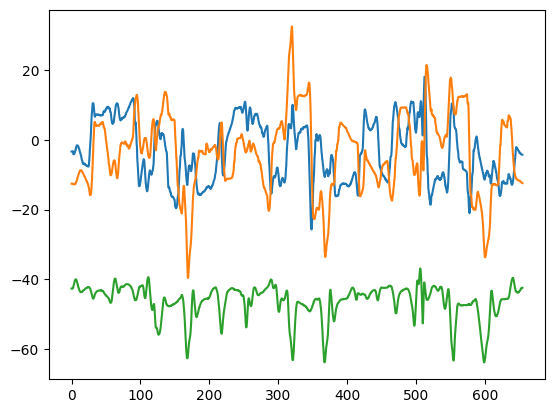

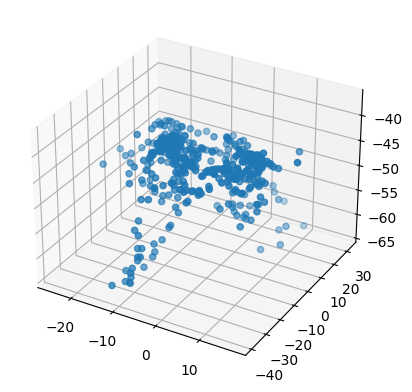

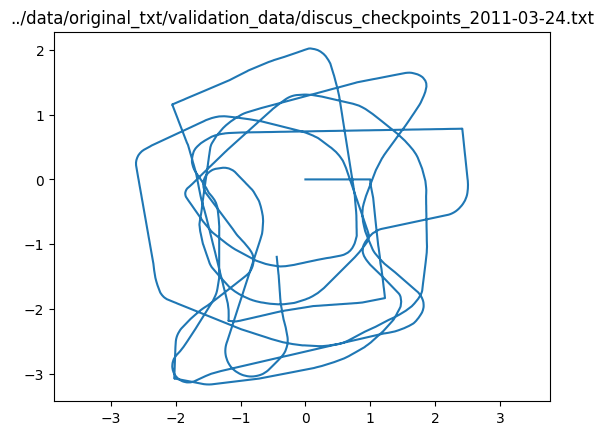

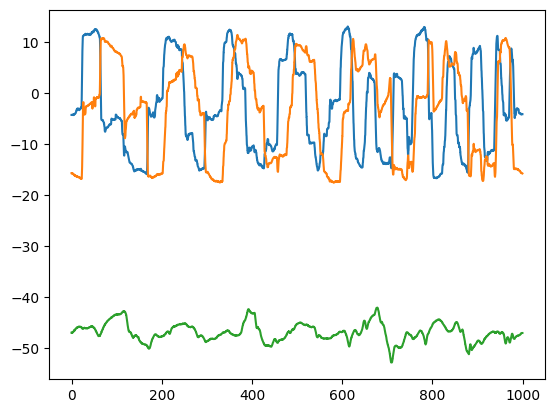

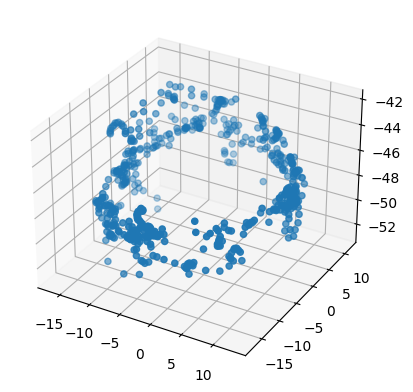

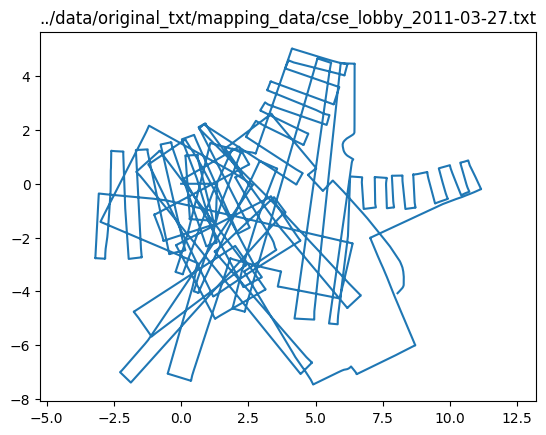

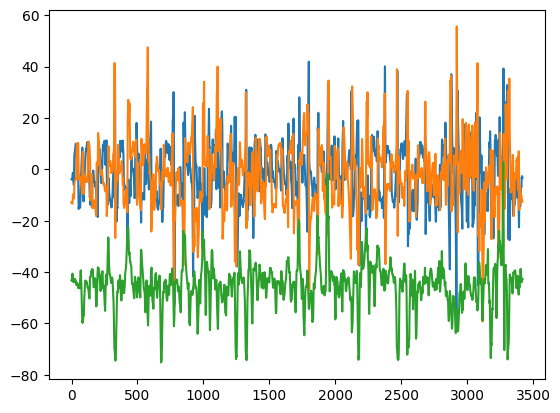

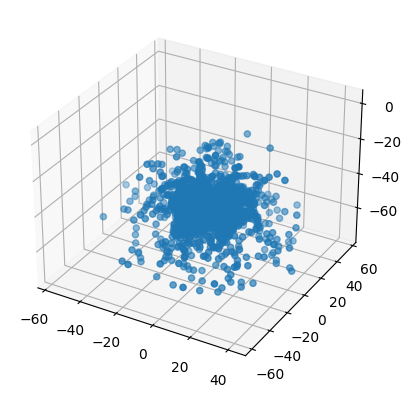

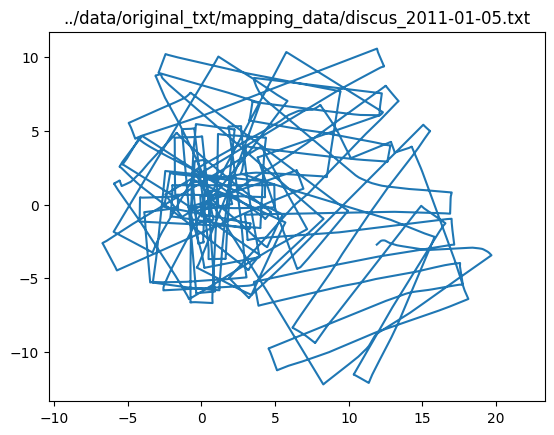

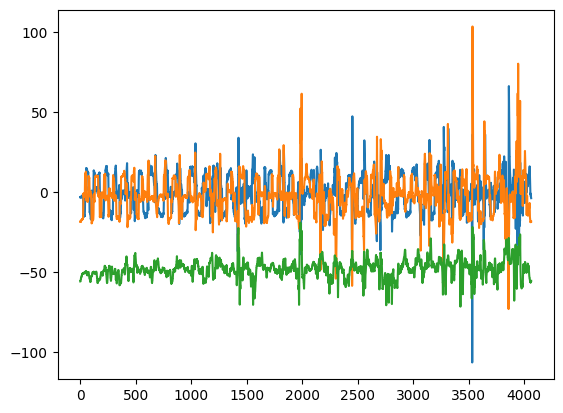

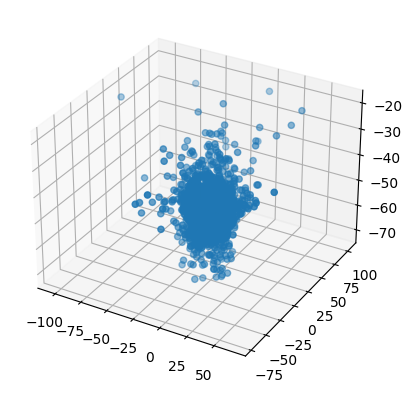

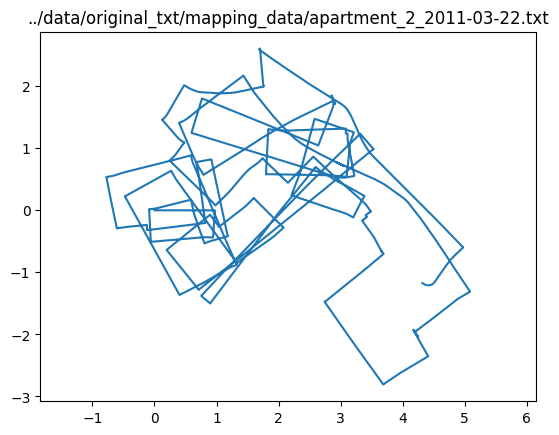

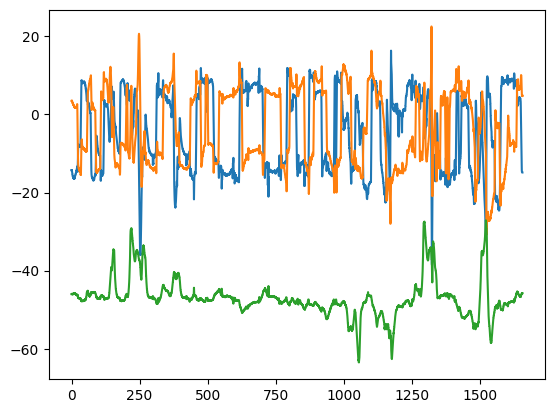

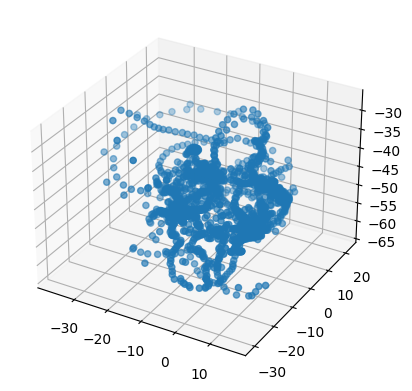

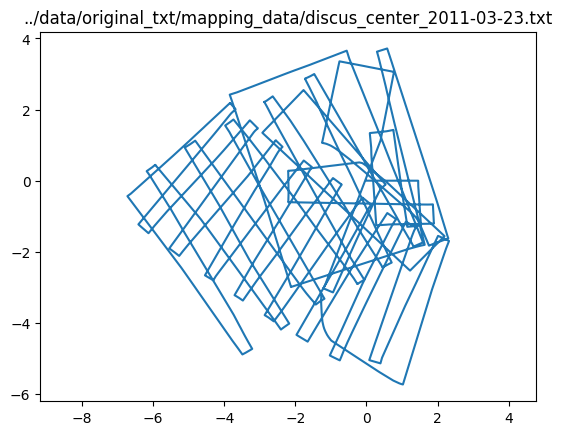

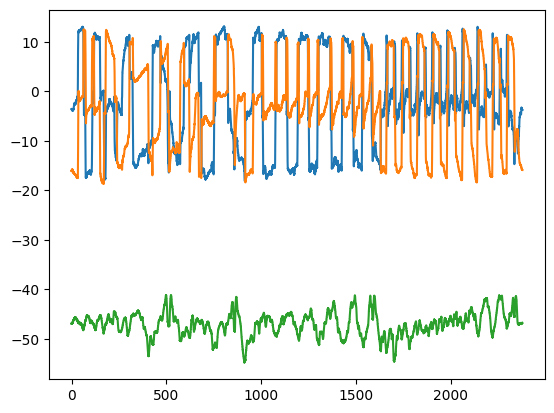

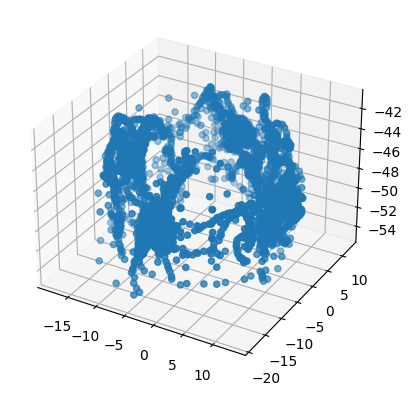

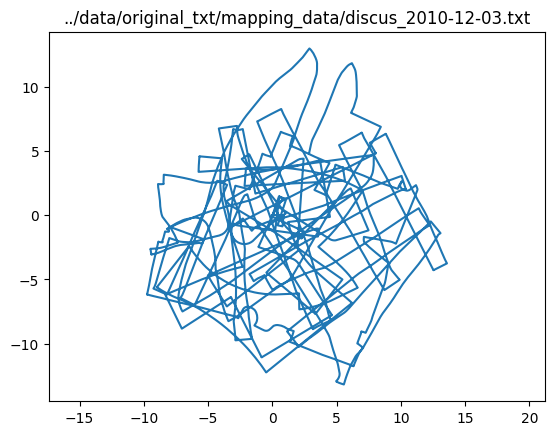

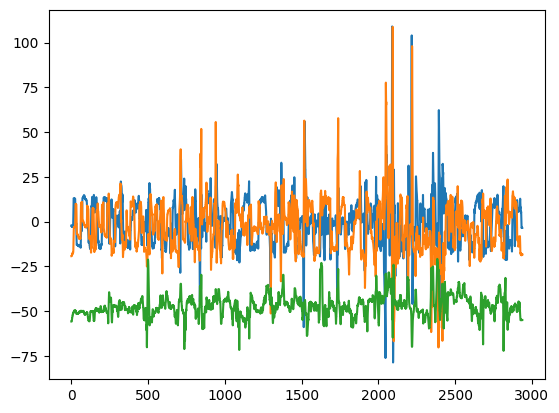

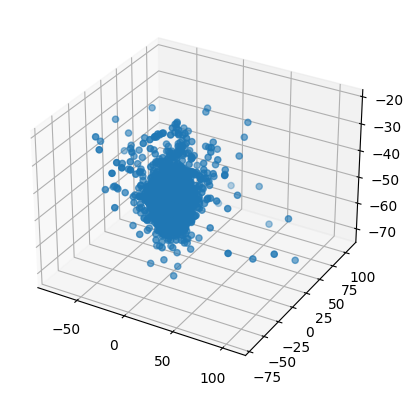

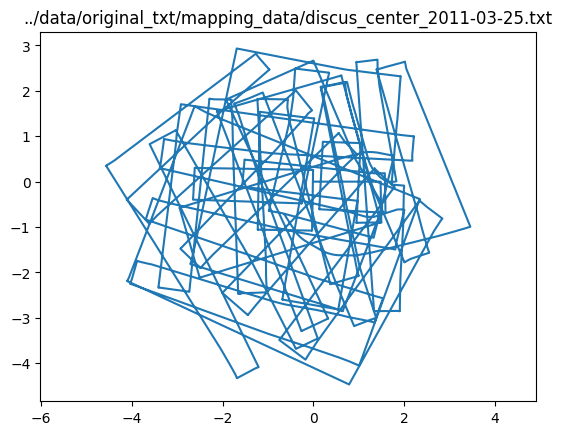

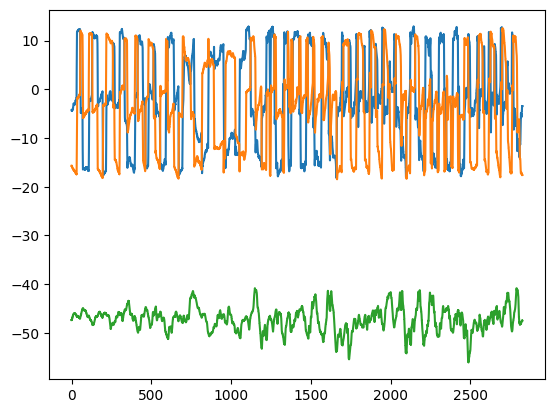

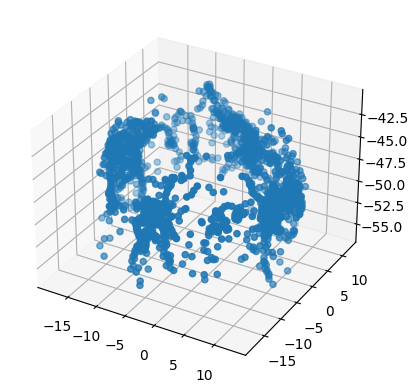

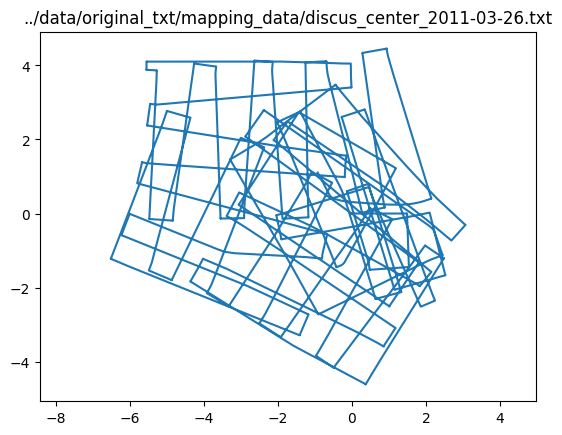

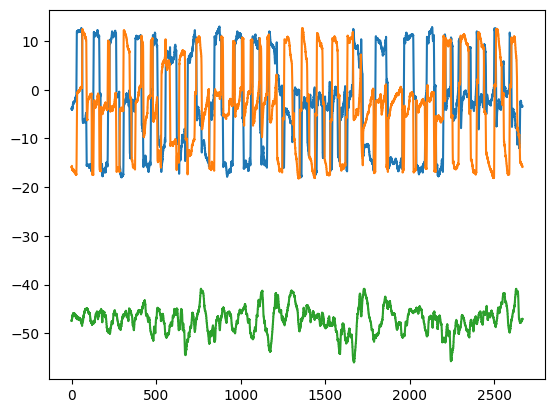

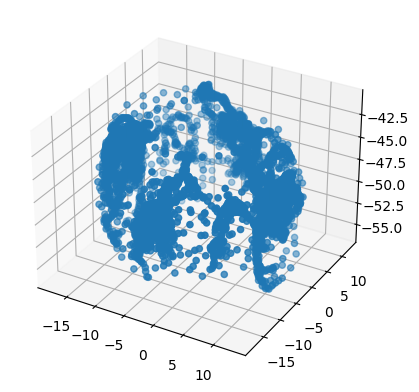

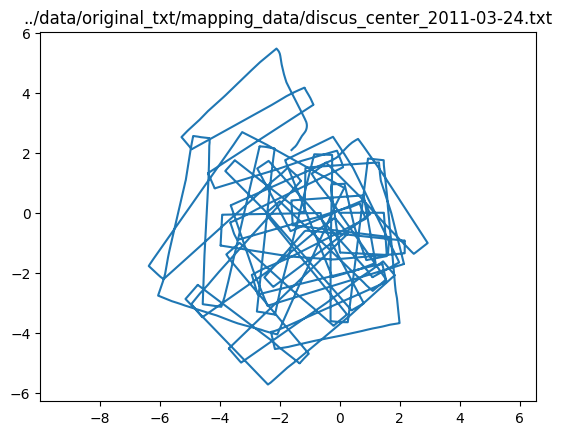

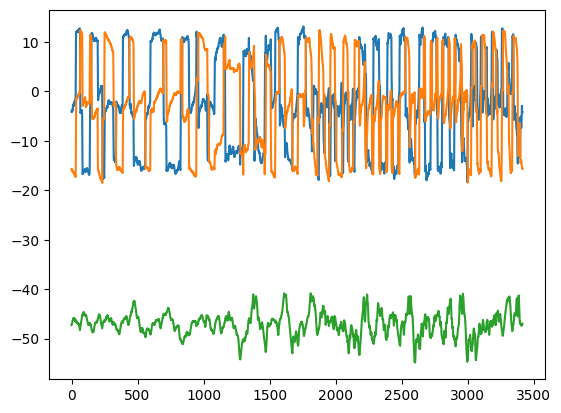

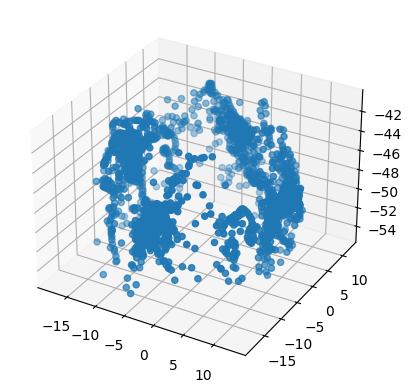

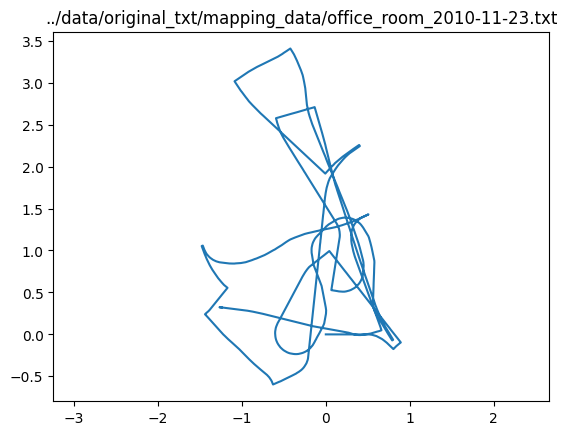

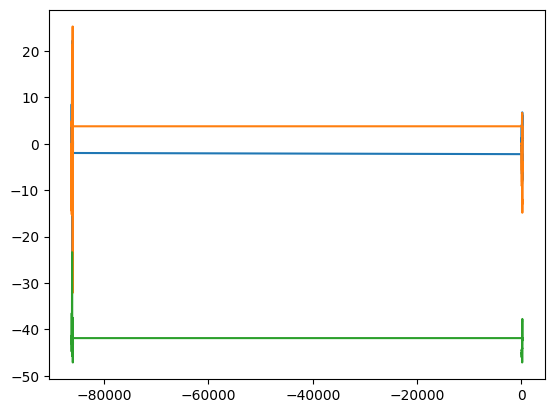

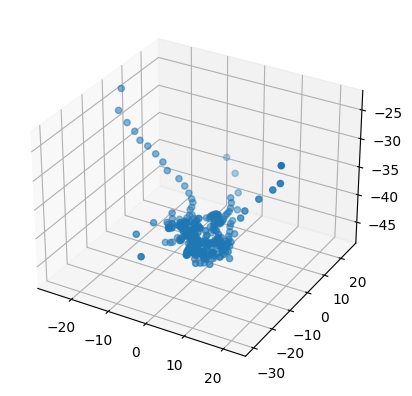

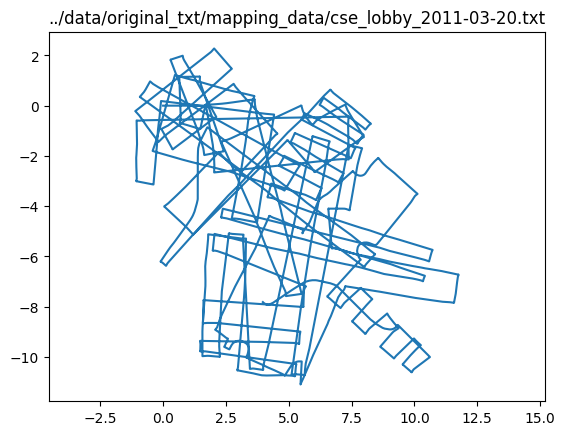

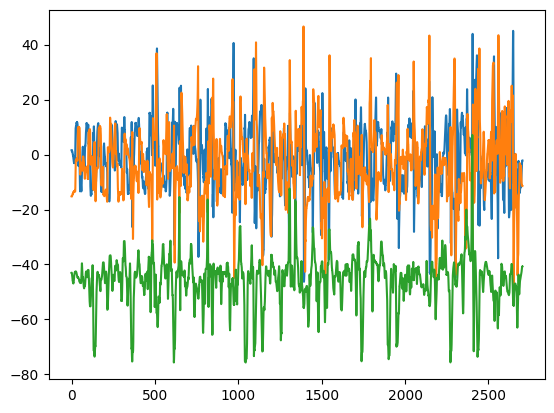

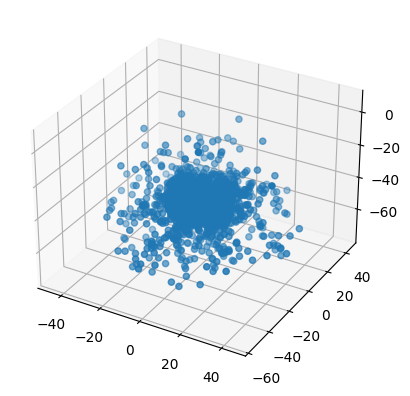

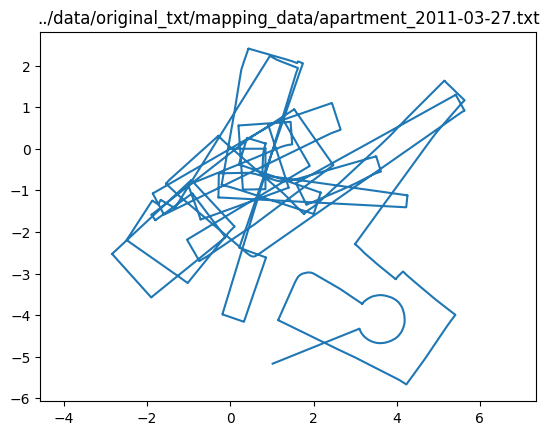

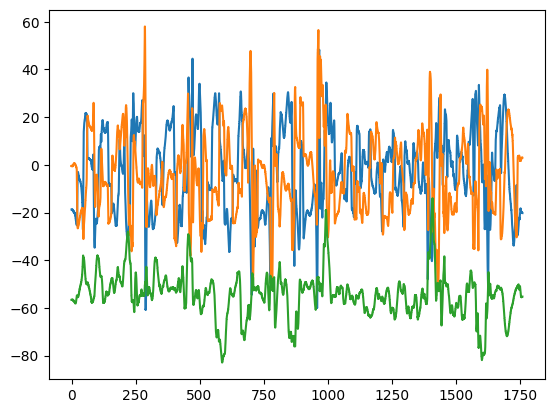

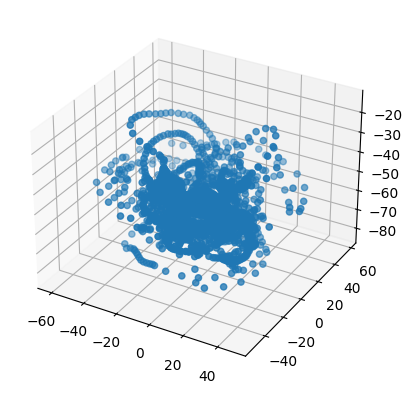

In [83]:
for file in glob.glob("../data/original_txt/**/*.txt", recursive=True):
    produce_csv(file)